In [ ]:
import numpy as np
import datetime
import math
import random
from time import time
from datetime import datetime
from statistics import mean
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from copy import deepcopy
from statistics import mean,variance,stdev
from google.colab import output
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

#Código Base

In [ ]:
import random

def evaluarSolucion(datos, solucion):
    error = 0
    for x,y in datos:
        yEstimada=0
        indice=0
        for i in solucion:
            yEstimada+=i*(x**indice)
            indice+=1
        error+=abs(yEstimada-y)
    return error/len(datos)

def aplicarOperadoresGeneticos(poblacion, k, cProb, mProb):
    nuevaPoblacion = []

    # Selección de padres mediante torneo tamaño k
    for _ in range(len(poblacion)):
        torneo = random.sample(poblacion, k)
        mejor_padre = min(torneo, key=lambda individuo: individuo[1])  # Seleccionar el mejor individuo del torneo basado en el fitness
        nuevaPoblacion.append(mejor_padre[0])  # Agregar el mejor individuo a la nueva población

    # Cruzar padres con probabilidad cProb
    for i in range(0, len(nuevaPoblacion), 2):
        if random.randint(1, 100) <= cProb:
            punto_cruce = random.randint(1, len(nuevaPoblacion[0]) - 1)
            padre1, padre2 = nuevaPoblacion[i], nuevaPoblacion[i + 1]
            hijo1 = padre1[:punto_cruce] + padre2[punto_cruce:]
            hijo2 = padre2[:punto_cruce] + padre1[punto_cruce:]
            nuevaPoblacion[i] = hijo1
            nuevaPoblacion[i + 1] = hijo2

    # Mutar padres con probabilidad mProb
    for i in range(len(nuevaPoblacion)):
        for j in range(len(nuevaPoblacion[0])):
            if random.random() <= mProb:
                sum = 0
                if random.random() <= 0.5:
                  sum = -0.01
                else:
                  sum = 0.01
                nuevaPoblacion[i][j] = sum + nuevaPoblacion[i][j]

    return nuevaPoblacion  # Devolver la nueva población (sin evaluar)
datos = [
        [-3,-329.24],[ -2.5,-18.696777],[-2,8.97],[-1.5,0.072636719], [-1,-2.86], [-0.5,-1.8504492], [0,0.25], [0.5,5.3464648], [1,27.12], [1.5,136.69088], [2,617.21], [2.5,2366.1753], [3,7788.22]
        ]
def main():
    datos = [
        [-3,-329.24],[ -2.5,-18.696777],[-2,8.97],[-1.5,0.072636719], [-1,-2.86], [-0.5,-1.8504492], [0,0.25], [0.5,5.3464648], [1,27.12], [1.5,136.69088], [2,617.21], [2.5,2366.1753], [3,7788.22]
        ]

    nSoluciones = 5000
    maxGeneraciones = 10
    k = 10
    cProb = 0.7
    mProb = 0.2
    valorMin=-100
    valorMax=100
    l=10

    poblacion = []
    for i in range(nSoluciones):

        solucion = []
        for j in range(l):
            variable = random.randint(valorMin,valorMax)
            solucion.append(variable)
        poblacion.append([solucion,evaluarSolucion(datos, solucion)])

    it=1
    while it < maxGeneraciones:
        print(f"Iteración: {it}")
        nuevaPoblacion = aplicarOperadoresGeneticos(poblacion,k,cProb,mProb)
        nuevaPoblacion = [[solucion, evaluarSolucion(datos,solucion)] for solucion in nuevaPoblacion]


        poblacion = []
        for solucion in nuevaPoblacion:
            poblacion.append(solucion)
        it+=1
    mejor_sol = poblacion[1]
    for sol in poblacion:

      if sol[1]<mejor_sol[1]:

        mejor_sol = sol

    print(f"Mejor Fitness: {mejor_sol[1]}\nMejor Solución: {mejor_sol[0]}")
if __name__ == "__main__":
    main()


Iteración: 1
Iteración: 2
Iteración: 3
Iteración: 4
Iteración: 5
Iteración: 6
Iteración: 7
Iteración: 8
Iteración: 9
Mejor Fitness: 2701.766806492768
Mejor Solución: [5.149999999999997, 99.83999999999992, 30.840000000000288, 64.49000000000025, 6.279999999999994, -57.0, -6.369999999999992, -2.5500000000000096, -0.6499999999999997, 0.7799999999999998]


In [ ]:
datos = [
        [-3,-329.24],
         [ -2.5,-18.696777],
        [-2,8.97],
          [-1.5,0.072636719],
         [-1,-2.86],
         [-0.5,-1.8504492],
         [0,0.25],
         [0.5,5.3464648],
         [1,27.12],
         [1.5,136.69088],
        [2,617.21],
         [2.5,2366.1753],
         [3,7788.22]
        ]

#Obtención de la función para comparaciones posteriores

Error Cuadrático Medio (MSE): 2.6312950962452504e-07


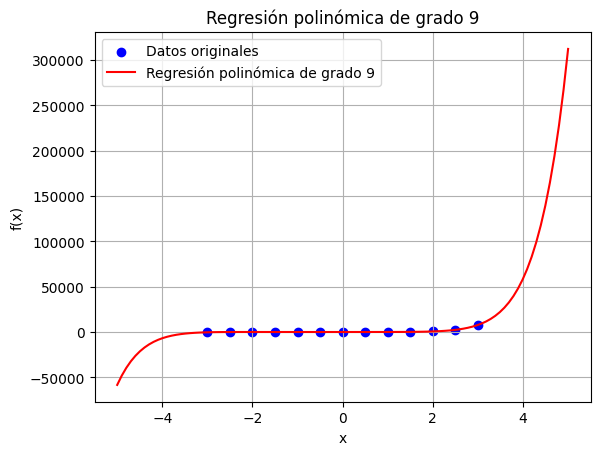

In [ ]:


x_data = np.array([-3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3])
y_data = np.array([-329.24, -18.696777, 8.97, 0.072636719, -2.86, -1.8504492, 0.25, 5.3464648, 27.12, 136.69088, 617.21, 2366.1753, 7788.22])

degree = 9
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x_data.reshape(-1, 1))

regression = LinearRegression()
regression.coef_ = [100,100,100,100,100,100,100,100,100]
regression.intercept_ = 100
regression.fit(x_poly, y_data)

x_reg = np.linspace(-5, 5, 100).reshape(-1, 1)
x_reg_poly = poly_features.transform(x_reg)
y_reg = regression.predict(x_reg_poly)

y_pred = regression.predict(x_poly)
mae = np.mean(abs(y_data - y_pred))

print("Error Cuadrático Medio (MSE):", mae)

plt.scatter(x_data, y_data, color='blue', label='Datos originales')
plt.plot(x_reg, y_reg, color='red', label=f'Regresión polinómica de grado {degree}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Regresión polinómica de grado {degree}')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(regression.coef_)
print('Fitness: ',evaluarSolucion(datos,regression.coef_))

[0.         5.69999909 4.77000178 5.15000206 4.19999869 3.09999891
 2.70000031 0.99000021 0.20999998 0.04999999]
Fitness:  0.24999966531419324


#Código Genérico y Funciones de Utilidad

##Funciones del algoritmo genético

In [ ]:

def ga_template(datos,nSoluciones,maxGeneraciones,k,cProb,mProb,valorMin,valorMax,func_evaluacion,func_cruce,func_mutacion,tam_sol=10,verbose=False,elitismo=False):

  def aplicarOperadoresGeneticos(datos,poblacion, k, cProb, mProb,evaluar_solucion):
    nuevaPoblacion = []



    nuevaPoblacion = func_cruce(datos,poblacion,k,cProb,evaluar_solucion)

    nuevaPoblacion = func_mutacion(nuevaPoblacion,mProb,evaluar_solucion)



    return nuevaPoblacion

  l=tam_sol


  poblacion = []
  for i in range(nSoluciones):

      solucion = []
      for j in range(l):
          variable = random.randint(valorMin,valorMax)
          solucion.append(variable)
      poblacion.append([solucion,func_evaluacion(datos, solucion)])

  it=1
  elite = [[],float('inf')]
  while it < maxGeneraciones:
      if verbose:
        output.clear()
        print(f"Generación: {it}")

      poblacion = deepcopy(aplicarOperadoresGeneticos(datos,poblacion,k,cProb,mProb,func_evaluacion))
      if elitismo:
        mejor = min(poblacion, key=lambda x: x[1])
        if mejor[1]<elite[1]:

          elite = deepcopy(mejor)


      it+=1

  if elitismo:
    return elite

  mejor_sol = poblacion[0]

  for sol in poblacion:
    if sol[1]<mejor_sol[1]:
      mejor_sol = sol
  if verbose:
    print(f"Mejor Fitness: {mejor_sol[1]}\nMejor Solución: {mejor_sol[0]}")

  return mejor_sol

def ga_template_experimento_elitismo(datos,nSoluciones,maxGeneraciones,k,cProb,mProb,valorMin,valorMax,func_evaluacion,func_cruce,func_mutacion,tam_sol=10,verbose=False):
  def aplicarOperadoresGeneticos(datos,poblacion, k, cProb, mProb,evaluar_solucion):
    nuevaPoblacion = []



    nuevaPoblacion = func_cruce(datos,poblacion,k,cProb,evaluar_solucion)

    nuevaPoblacion = func_mutacion(nuevaPoblacion,mProb,evaluar_solucion)



    return nuevaPoblacion

  l=tam_sol


  poblacion = []
  for i in range(nSoluciones):

      solucion = []
      for j in range(l):
          variable = random.randint(valorMin,valorMax)
          solucion.append(variable)
      poblacion.append([solucion,func_evaluacion(datos, solucion)])

  it=1
  elite = [[],float('inf')]
  while it < maxGeneraciones:
      if verbose:
        output.clear()
        print(f"Generación: {it}")
      #Modelo generacional
      poblacion = deepcopy(aplicarOperadoresGeneticos(datos,poblacion,k,cProb,mProb,func_evaluacion))

      mejor = min(poblacion, key=lambda x: x[1])
      if mejor[1]<elite[1]:

        elite = deepcopy(mejor)


      it+=1



  mejor_sol = poblacion[0]

  for sol in poblacion:
    if sol[1]<mejor_sol[1]:
      mejor_sol = sol
  if verbose:
    print(f"Mejor Fitness: {mejor_sol[1]}\nMejor Solución: {mejor_sol[0]}")
  if mejor_sol[1]<elite[1]:
    print('Error de implementación')
  return mejor_sol,elite

def ga_eval_experimento_elitismo(datos,nSoluciones,maxGeneraciones,k,cProb,mProb,valorMin,valorMax,func_evaluacion,func_cruce,func_mutacion,tam_sol=10,tam_med=5,verbose=False):

  err_it = []
  err_it_elitismo = []
  tiem_it_elitismo = []
  for i in range(tam_med):

    s= ga_template_experimento_elitismo(datos,nSoluciones,maxGeneraciones,k,cProb,mProb,valorMin,valorMax,func_evaluacion,func_cruce,func_mutacion,tam_sol,verbose)

    err_it.append(s[0][1])
    err_it_elitismo.append(s[1][1])


  return mean(err_it),stdev(err_it),mean(err_it_elitismo),stdev(err_it_elitismo)

def ga_template_per_gen(datos,nSoluciones,maxGeneraciones,k,cProb,mProb,valorMin,valorMax,func_evaluacion,func_cruce,func_mutacion,tam_sol=10,verbose=False):

  def aplicarOperadoresGeneticos(datos,poblacion, k, cProb, mProb,evaluar_solucion):
    nuevaPoblacion = []



    nuevaPoblacion = func_cruce(datos,poblacion,k,cProb,evaluar_solucion)

    nuevaPoblacion = func_mutacion(nuevaPoblacion,mProb,evaluar_solucion)



    return nuevaPoblacion

  l=tam_sol


  poblacion = []
  for i in range(nSoluciones):

      solucion = []
      for j in range(l):
          variable = random.randint(valorMin,valorMax)
          solucion.append(variable)
      poblacion.append([solucion,func_evaluacion(datos, solucion)])

  it=1
  gens = []
  errs = []
  err_stds = []
  while it <= maxGeneraciones:
      if verbose:
        output.clear()
        print(f"Generación: {it}")
      #Modelo generacional
      poblacion = deepcopy(aplicarOperadoresGeneticos(datos,poblacion,k,cProb,mProb,func_evaluacion))
      gens.append(it)
      errs.append(mean(map(lambda x: x[1], poblacion)))
      err_stds.append(stdev(map(lambda x: x[1], poblacion)))

      it+=1


  return gens,errs,err_stds
def ga_eval(datos,nSoluciones,maxGeneraciones,k,cProb,mProb,valorMin,valorMax,func_evaluacion,func_cruce,func_mutacion,tam_sol=10,v_variacion=None,lim_inf=0,lim_sup=0,incr=0,tam_med=5,verbose=False,elitismo=False):

  variables = {'nSoluciones':0,'maxGeneraciones':1,'k':2,'cProb':3,'mProb':4}
  params = [nSoluciones,maxGeneraciones,k,cProb,mProb]
  v_variables = []
  err_med = []
  err_std = []
  tiem_med = []
  tiem_std = []
  var = variables[v_variacion]
  params[var] = lim_inf
  while params[var] <= lim_sup :
    if verbose:
      print(f'Iteración de {v_variacion} = {var}')
    v_variables.append(params[var])

    err_it = []
    tiem_it = []
    for i in range(tam_med):
      tiempoInicio = time()
      s= ga_template(datos,params[0],params[1],params[2],params[3],params[4],valorMin,valorMax,func_evaluacion,func_cruce,func_mutacion,tam_sol,verbose,elitismo)
      tiem_it.append((time()-tiempoInicio)*1000)
      err_it.append(s[1])
    err_med.append(mean(err_it))
    err_std.append(stdev(err_it))
    tiem_med.append(mean(tiem_it))
    tiem_std.append(stdev(tiem_it))

    params[var]= params[var]+incr

  return v_variables,err_med,tiem_med,err_std,tiem_std

def ga_eval_per_gen(datos,nSoluciones,maxGeneraciones,k,cProb,mProb,valorMin,valorMax,func_evaluacion,func_cruce,func_mutacion,tam_sol=10,v_variacion=None,lim_inf=0,lim_sup=0,incr=0,verbose=False):

  variables = {'nSoluciones':0,'maxGeneraciones':1,'k':2,'cProb':3,'mProb':4}
  params = [nSoluciones,maxGeneraciones,k,cProb,mProb]
  v_variables = []
  err_med = []
  err_std = []
  tiem_med = []
  tiem_std = []
  var = variables[v_variacion]
  gens = []
  errs_generales = []
  errs_std_generales = []
  params[var] = lim_inf
  while params[var] <= lim_sup :
    if verbose:
      print(f'Iteración de {v_variacion} = {var}')
    v_variables.append(params[var])

    gens,errs,stds = ga_template_per_gen(datos,params[0],params[1],params[2],params[3],params[4],valorMin,valorMax,func_evaluacion,func_cruce,func_mutacion)
    errs_generales.append(errs)
    errs_std_generales.append(stds)

    params[var]= params[var]+incr

  return v_variables,gens,errs_generales,errs_std_generales


def ga_eval_mejor_cprob_mprob(datos,nSoluciones,maxGeneraciones,k,cProb,mProb,valorMin,valorMax,func_evaluacion,func_cruce,func_mutacion,tam_sol=10,tam_med=5,verbose=False):


  eje_xy = []
  err_med = []
  err_std = []
  tiem_med = []
  tiem_std = []
  cProb = 0
  mProb = 0
  while cProb<=100:
    mProb = 0
    while mProb<=100:
      if verbose:
        print(f'Iteración con cProb= {cProb}, mProb={mProb}')
      eje_xy.append([cProb,mProb])


      err_it = []
      tiem_it = []
      for i in range(tam_med):
        tiempoInicio = time()
        s= ga_template(datos,nSoluciones,maxGeneraciones,k,cProb,mProb,valorMin,valorMax,func_evaluacion,func_cruce,func_mutacion)
        tiem_it.append((time()-tiempoInicio)*1000)
        err_it.append(s[1])
      err_med.append(mean(err_it))
      err_std.append(stdev(err_it))
      tiem_med.append(mean(tiem_it))
      tiem_std.append(stdev(tiem_it))
      mProb+=10
    cProb+=10


  return eje_xy,err_med,tiem_med,err_std,tiem_std

def ga_eval_varias_funciones(datos,nSoluciones,maxGeneraciones,k,cProb,mProb,valorMin,valorMax,func_evaluacion,func_cruce,func_mutacion,tam_sol=10,tam_med=5,funciones=None,modo='m',verbose=False):

  #modo debe ser 'm' o 'c'
  eje_x = []
  err_med = []
  err_std = []
  tiem_med = []
  tiem_std = []

  if modo == 'c':
    for f in funciones:
      err_it = []
      tiem_it = []
      for i in range(tam_med):
        tiempoInicio = time()
        s= ga_template(datos,nSoluciones,maxGeneraciones,k,cProb,mProb,valorMin,valorMax,func_evaluacion,f,func_mutacion)
        tiem_it.append((time()-tiempoInicio)*1000)
        err_it.append(s[1])
      err_med.append(mean(err_it))
      err_std.append(stdev(err_it))
      tiem_med.append(mean(tiem_it))
      tiem_std.append(stdev(tiem_it))
      eje_x.append(f.__name__)
  else:
    for f in funciones:
      err_it = []
      tiem_it = []
      for i in range(tam_med):
        tiempoInicio = time()
        s= ga_template(datos,nSoluciones,maxGeneraciones,k,cProb,mProb,valorMin,valorMax,func_evaluacion,func_cruce,f)
        tiem_it.append((time()-tiempoInicio)*1000)
        err_it.append(s[1])
      err_med.append(mean(err_it))
      err_std.append(stdev(err_it))
      tiem_med.append(mean(tiem_it))
      tiem_std.append(stdev(tiem_it))
      eje_x.append(f.__name__)

  return eje_x,err_med,tiem_med,err_std,tiem_std

In [ ]:
def evaluar_poblacion(datos,poblacion):
  nueva_poblacion = [[solucion, evaluarSolucion(datos,solucion)] for solucion in poblacion]
  return nueva_poblacion

##Funciones de Gráficas

In [ ]:
def plot_individual(gens, err_med, err_std, labelx='Generaciones', labely='Error Medio', log=False):
    err_lim_sup = [e1 + e2 for e1, e2 in zip(err_med, err_std)]
    err_lim_inf = [e1 - e2 for e1, e2 in zip(err_med, err_std)]

    plt.plot(gens, err_med, color='b', label=labely)
    plt.fill_between(gens, err_lim_inf, err_lim_sup, color='b', alpha=0.3, label=labely + '±σ')
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title(labely + ' / ' + labelx)
    plt.legend()
    if log:
        plt.yscale('log', base=10)  # Establece la escala logarítmica en el eje y
    plt.show()


In [ ]:
def plot_generacional(gens, v_variables, errs_med, errs_std, labelx='Generaciones', labely='Error Medio', var='k', log=False):
    colores = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
    it_colors = 0
    fig, ax = plt.subplots()  # Crear una figura y ejes para subgráficos
    for err, std, v in zip(errs_med, errs_std, v_variables):
        err_lim_sup = [e1 + e2 for e1, e2 in zip(err, std)]
        err_lim_inf = [e1 - e2 for e1, e2 in zip(err, std)]
        ax.plot(gens, err, color=colores[it_colors], label=labely + ' ' + var + '=' + str(v))
        ax.fill_between(gens, err_lim_inf, err_lim_sup, color=colores[it_colors], alpha=0.3)
        it_colors += 1

    ax.set_xlabel(labelx)
    ax.set_ylabel(labely)
    ax.set_title(labely + ' / ' + labelx)
    ax.legend()
    if log:
        ax.set_yscale('log', base=10)  # Establecer la escala logarítmica en el eje y
    plt.show()

In [ ]:
def plot_individual_3d(eje_xy, err_med, labelx='X', labely='Y', labelz='Z', log=False):

    x, y = zip(*eje_xy)  # Dividir el array de arrays en dos arrays separados para x y y


    xi = np.linspace(min(x), max(x), 100)
    yi = np.linspace(min(y), max(y), 100)
    X, Y = np.meshgrid(xi, yi)


    Z = griddata((x, y), err_med, (X, Y), method='cubic')

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')


    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')


    for i in range(len(x)):
        ax.plot([x[i], x[i]], [y[i], y[i]], color='r', linestyle='dashed')

    ax.set_xlabel(labelx)
    ax.set_ylabel(labely)
    ax.set_zlabel(labelz)
    ax.set_title(labelz + ' / ' + labelx + ' / ' + labely)
    if log:
        ax.set_zscale('log')

    ax.invert_xaxis()
    plt.show()




In [ ]:
def plot_barras(x_labels, y_values, std_values=None, xlabel='X', ylabel='Y', title='Error Mínimo Medio / Función'):


    plt.bar(x_labels, y_values, yerr=std_values, capsize=5)


    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=35)

    plt.show()




#Implementa diferentes operadores genéticos de cruce y mutación. De entre todos los operadores implementados,analiza qué combinación de operadores y probabilidades (cruce y mutación) da mejores resultados. Justifica tu respuesta mediante estudios experimentales.

##Definición de diferentes operadores de cruce y mutación

In [ ]:
def c_punto_aleat(datos,poblacion,k,cProb,evaluar_solucion):

  nuevaPoblacion = []
  for _ in range(len(poblacion)):
    torneo = random.sample(poblacion, k)
    mejor_padre = min(torneo, key=lambda x: x[1])

    nuevaPoblacion.append(deepcopy(mejor_padre))


  for i in range(0, len(nuevaPoblacion), 2):

    if random.randint(1, 100) <= cProb:
      padre1, padre2 = nuevaPoblacion[i][0],nuevaPoblacion[i+1][0]

      #Esto es lo que hay que cambiar
      punto_cruce = random.randint(1, len(padre1) - 1)
      #punto_cruce = 5
      hijo1 = padre1[:punto_cruce] + padre2[punto_cruce:]
      hijo2 = padre2[:punto_cruce] + padre1[punto_cruce:]


      nuevaPoblacion[i][0] = deepcopy(hijo1)
      nuevaPoblacion[i][1] = evaluar_solucion(datos,hijo1)
      nuevaPoblacion[i+1][0]= deepcopy(hijo2)
      nuevaPoblacion[i+1][1]= evaluar_solucion(datos,hijo2)
  return nuevaPoblacion

def c_uniforme(datos,poblacion,k,cProb,evaluar_solucion):
  nuevaPoblacion = []
  for _ in range(len(poblacion)):
    torneo = random.sample(poblacion, k)
    mejor_padre = min(torneo, key=lambda x: x[1])
    nuevaPoblacion.append(deepcopy(mejor_padre))
  for i in range(0, len(nuevaPoblacion), 2):
    if random.randint(1, 100) <= cProb:
      padre1, padre2 = nuevaPoblacion[i][0],nuevaPoblacion[i+1][0]

      #Esto es lo que hay que cambiar
      hijo1 = []
      hijo2 = []

      for j in range(len(padre1)):
        if random.randint(1, 100) <= 50:
            hijo1.append(padre1[j])
            hijo2.append(padre2[j])
        else:
            hijo2.append(padre1[j])
            hijo1.append(padre2[j])


      nuevaPoblacion[i][0] = hijo1.copy()
      nuevaPoblacion[i+1][0]= hijo2.copy()
      nuevaPoblacion[i][1] = evaluar_solucion(datos,hijo1)
      nuevaPoblacion[i+1][1]= evaluar_solucion(datos,hijo2)
  return nuevaPoblacion

# HUX
def c_hux(datos,poblacion,k,cProb,evaluar_solucion):
  nuevaPoblacion = []
  for _ in range(len(poblacion)):
      torneo = random.sample(poblacion, k)
      mejor_padre = min(torneo, key=lambda x: x[1])
      nuevaPoblacion.append(deepcopy(mejor_padre))
  for i in range(0, len(nuevaPoblacion), 2):
      if random.randint(1, 100) <= cProb:
          padre1, padre2 = nuevaPoblacion[i][0],nuevaPoblacion[i+1][0]

          #Esto es lo que hay que cambiar
          hijo1, hijo2 = padre1.copy(), padre2.copy()

          indices_diferentes = [i for i in range(len(padre1)) if padre1[i] != padre2[i]]

          indices_intercambiar = random.sample(indices_diferentes, len(indices_diferentes) // 2)

          for i in indices_intercambiar:
              hijo1[i], hijo2[i] = padre2[i], padre1[i]

          nuevaPoblacion[i][0] = hijo1.copy()
          nuevaPoblacion[i+1][0]= hijo2.copy()
          nuevaPoblacion[i][1] = evaluar_solucion(datos,hijo1)
          nuevaPoblacion[i+1][1]= evaluar_solucion(datos,hijo2)

  return nuevaPoblacion

def c_aritmetico(datos,poblacion,k,cProb,evaluar_solucion):
  nuevaPoblacion = []
  for _ in range(len(poblacion)):
      torneo = random.sample(poblacion, k)
      mejor_padre = min(torneo, key=lambda x: x[1])
      nuevaPoblacion.append(deepcopy(mejor_padre))
  for i in range(0, len(nuevaPoblacion), 2):
      if random.randint(1, 100) <= cProb:
          padre1, padre2 = nuevaPoblacion[i][0],nuevaPoblacion[i+1][0]
          #Esto es lo que hay que cambiar
          hijo1 = [(gen1+gen2)/2 for gen1, gen2 in zip(padre1, padre2)]
          hijo2 = [(gen1+gen2)*2 for gen1, gen2 in zip(padre1, padre2)]

          nuevaPoblacion[i][0] = hijo1.copy()
          nuevaPoblacion[i+1][0]= hijo2.copy()
          nuevaPoblacion[i][1] = evaluar_solucion(datos,hijo1)
          nuevaPoblacion[i+1][1]= evaluar_solucion(datos,hijo2)

  return nuevaPoblacion

def c_blx_alpha(datos,poblacion,k,cProb,evaluar_solucion):
    nuevaPoblacion = []
    for _ in range(len(poblacion)):
        torneo = random.sample(poblacion, k)
        mejor_padre = min(torneo, key=lambda x: x[1])
        nuevaPoblacion.append(deepcopy(mejor_padre))
    for i in range(0, len(nuevaPoblacion), 2):
        if random.randint(1, 100) <= cProb:
            padre1, padre2 = nuevaPoblacion[i][0],nuevaPoblacion[i+1][0]

            #Esto es lo que hay que cambiar
            alpha = 0.5

            hijo1 = deepcopy(padre1)
            hijo2 = deepcopy(padre2)

            for i in range(len(padre1)):
                rango = abs(hijo1[i] - hijo2[i])

                l = min(hijo1[i], hijo2[i]) - alpha * rango
                u = max(hijo1[i], hijo2[i]) - alpha * rango

                hijo1[i] = l + random.random() * (u - l)
                hijo2[i] = l + random.random() * (u - l)

            nuevaPoblacion[i][0] = hijo1.copy()
            nuevaPoblacion[i+1][0]= hijo2.copy()
            nuevaPoblacion[i][1] = evaluar_solucion(datos,hijo1)
            nuevaPoblacion[i+1][1]= evaluar_solucion(datos,hijo2)

    return nuevaPoblacion



In [ ]:
def mut_incr_aleat(nuevaPoblacion,mProb,evaluar_solucion):


  for i in range(len(nuevaPoblacion)):
    if random.randint(1,100) <= mProb:
      j = random.randint(0,len(nuevaPoblacion[0][0])-1)
      sum = 0.1
      if random.random() <= 0.5:
        sum = -1*sum
      else:
        sum = 1*sum

      nuevaPoblacion[i][0][j] += sum
      nuevaPoblacion[i][0][j] = round(nuevaPoblacion[i][0][j], 1)
      nuevaPoblacion[i][1] = evaluar_solucion(datos,nuevaPoblacion[i][0])

  return nuevaPoblacion

def mut_mult_aleat(nuevaPoblacion,mProb,evaluar_solucion):

  for i in range(len(nuevaPoblacion)):
    if random.randint(1,100) <= mProb:
      j = random.randint(0,len(nuevaPoblacion[0][0])-1)

      nuevaPoblacion[i][0][j] *= random.uniform(0.95, 1.05)
      nuevaPoblacion[i][1] = evaluar_solucion(datos,nuevaPoblacion[i][0])

  return nuevaPoblacion


def mut_intercambio_aleat(nuevaPoblacion,mProb,evaluar_solucion):

  for i in range(len(nuevaPoblacion)):
    if random.randint(1,100) <= mProb:
      j1 = random.randint(0,len(nuevaPoblacion[i][0])-1)
      j2 = random.randint(0,len(nuevaPoblacion[i][0])-1)

      aux=nuevaPoblacion[i][0][j1]
      nuevaPoblacion[i][0][j1] = nuevaPoblacion[i][0][j2]
      aux=nuevaPoblacion[i][0][j2] = aux
      nuevaPoblacion[i][1] = evaluar_solucion(datos,nuevaPoblacion[i][0])

  return nuevaPoblacion


def mut_gaussiana(nuevaPoblacion,mProb,evaluar_solucion):
  for i in range(len(nuevaPoblacion)):
    if random.randint(1,100) <= mProb:

      for j in range(len(nuevaPoblacion[i][0])-1):
        ruido = np.random.normal(0, 1.5)
        nuevaPoblacion[i][0][j] += ruido
      nuevaPoblacion[i][1] = evaluar_solucion(datos,nuevaPoblacion[i][0])


  return nuevaPoblacion

##Comparaciones de las funciones de mutación y cruce

In [ ]:
funciones_cruce = [c_punto_aleat,c_uniforme, c_hux, c_aritmetico, c_blx_alpha]

In [ ]:
eje_x,err_med,tiem_med,err_std,tiem_std = ga_eval_varias_funciones(datos,100,100,5,70,20,-100,100,evaluarSolucion,c_punto_aleat,mut_incr_aleat,tam_sol=10,tam_med=100,funciones=funciones_cruce,modo='c',verbose=False)

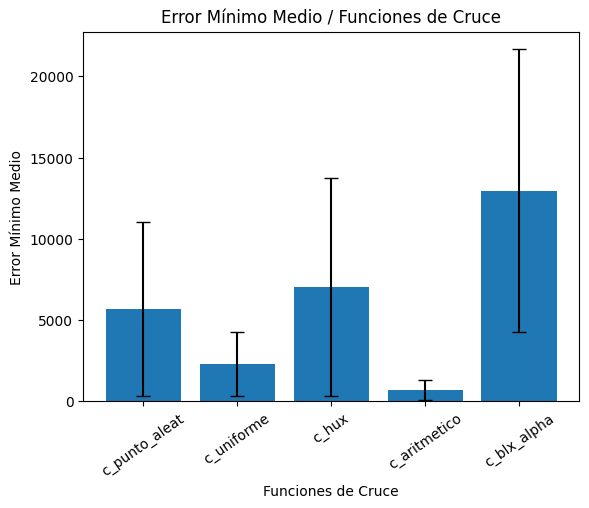

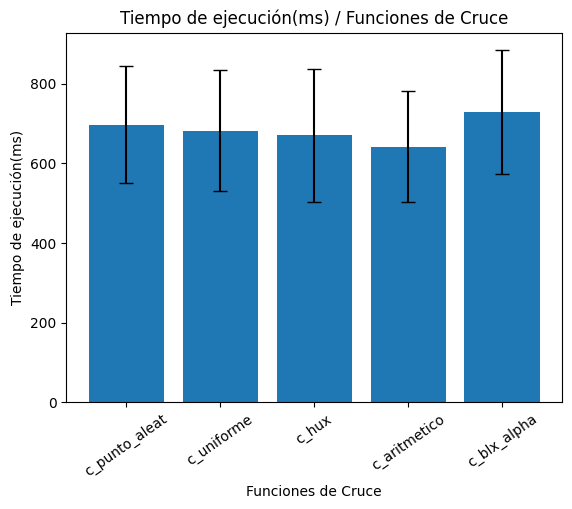

In [ ]:
plot_barras(eje_x, err_med,err_std, xlabel='Funciones de Cruce', ylabel='Error Mínimo Medio', title='Error Mínimo Medio / Funciones de Cruce')
plot_barras(eje_x, tiem_med,tiem_std, xlabel='Funciones de Cruce', ylabel='Tiempo de ejecución(ms)', title='Tiempo de ejecución(ms) / Funciones de Cruce')

In [ ]:
funciones_mutacion = [mut_incr_aleat, mut_mult_aleat, mut_intercambio_aleat, mut_gaussiana]

In [ ]:
eje_x,err_med,tiem_med,err_std,tiem_std = ga_eval_varias_funciones(datos,100,100,5,70,20,-100,100,evaluarSolucion,c_aritmetico,mut_incr_aleat,tam_sol=10,tam_med=100,funciones=funciones_mutacion,modo='m',verbose=False)

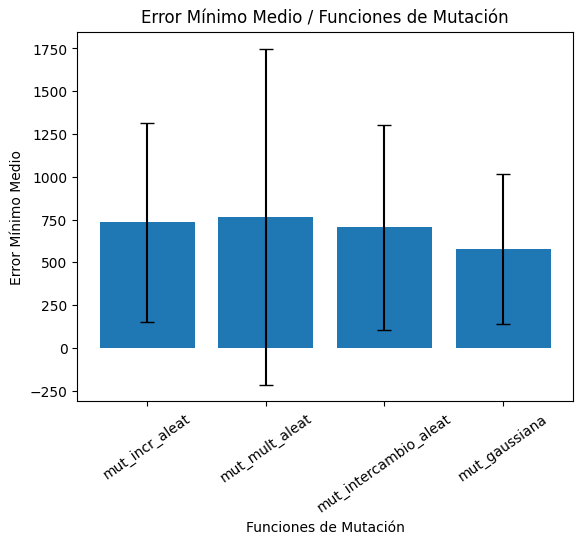

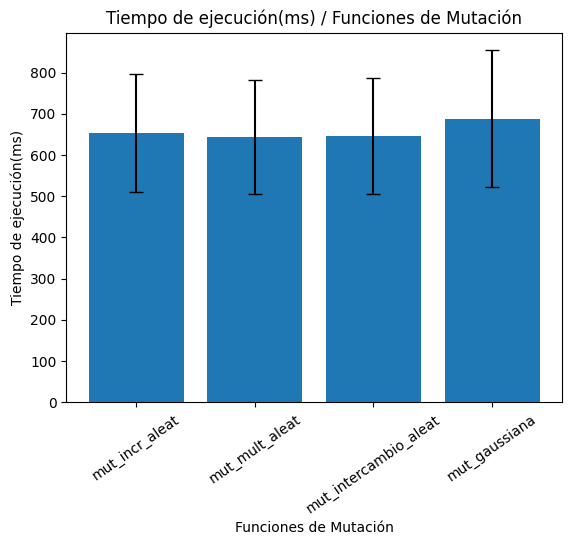

In [ ]:
plot_barras(eje_x, err_med,err_std, xlabel='Funciones de Mutación', ylabel='Error Mínimo Medio', title='Error Mínimo Medio / Funciones de Mutación')
plot_barras(eje_x, tiem_med,tiem_std, xlabel='Funciones de Mutación', ylabel='Tiempo de ejecución(ms)', title='Tiempo de ejecución(ms) / Funciones de Mutación')

##Qué combinación de operadores y probabilidades (cruce y mutación) da mejores resultados

In [ ]:
eje_xy,err_med,tiem_med,err_std,tiem_std = ga_eval_mejor_cprob_mprob(datos,100,100,5,70,20,-100,100,evaluarSolucion,c_uniforme,mut_gaussiana,10,tam_med=10,verbose=True)

Iteración con cProb= 0, mProb=0
Iteración con cProb= 0, mProb=10
Iteración con cProb= 0, mProb=20
Iteración con cProb= 0, mProb=30
Iteración con cProb= 0, mProb=40
Iteración con cProb= 0, mProb=50
Iteración con cProb= 0, mProb=60
Iteración con cProb= 0, mProb=70
Iteración con cProb= 0, mProb=80
Iteración con cProb= 0, mProb=90
Iteración con cProb= 0, mProb=100
Iteración con cProb= 10, mProb=0
Iteración con cProb= 10, mProb=10
Iteración con cProb= 10, mProb=20
Iteración con cProb= 10, mProb=30
Iteración con cProb= 10, mProb=40
Iteración con cProb= 10, mProb=50
Iteración con cProb= 10, mProb=60
Iteración con cProb= 10, mProb=70
Iteración con cProb= 10, mProb=80
Iteración con cProb= 10, mProb=90
Iteración con cProb= 10, mProb=100
Iteración con cProb= 20, mProb=0
Iteración con cProb= 20, mProb=10
Iteración con cProb= 20, mProb=20
Iteración con cProb= 20, mProb=30
Iteración con cProb= 20, mProb=40
Iteración con cProb= 20, mProb=50
Iteración con cProb= 20, mProb=60
Iteración con cProb= 20, m

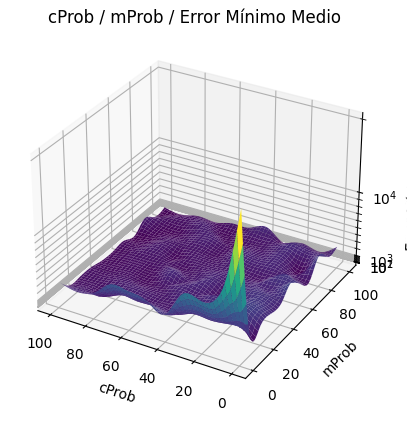

In [ ]:
plot_individual_3d(eje_xy, err_med, labelx='cProb', labely='mProb', labelz='Error Mínimo Medio', log=True)

In [ ]:
def get_optimal_probs(eje_xy,err_med):
  i = np.argmin(err_med)
  cProb,mProb = eje_xy[i]
  print(f'Probabilidades Óptimas cProb= {cProb}, mProb={mProb}')
  return cProb,mProb
print(get_optimal_probs(eje_xy,err_med))

Probabilidades Óptimas cProb= 100, mProb=70
(100, 70)


#Realiza un estudio de los parámetros del algoritmo, analizando su comportamiento cuando se cambia: número de soluciones, número de generaciones, tamaño del torneo, probabilidad de cruce y probabilidad de mutación.

##Parámetro Número de soluciones



In [ ]:
v_variables,gens,errs_generales,errs_std_generales = ga_eval_per_gen(datos,100,100,5,70,20,-100,100,evaluarSolucion,c_punto_aleat,mut_gaussiana,10,v_variacion='nSoluciones',lim_inf=50,lim_sup=250,incr=100,verbose=False)
plot_generacional(gens,v_variables,errs_generales,errs_std_generales,labelx='Generaciones',labely='Error Medio',var='nSoluciones',log=True)

##Parámetro Tamaño de Torneo (k)

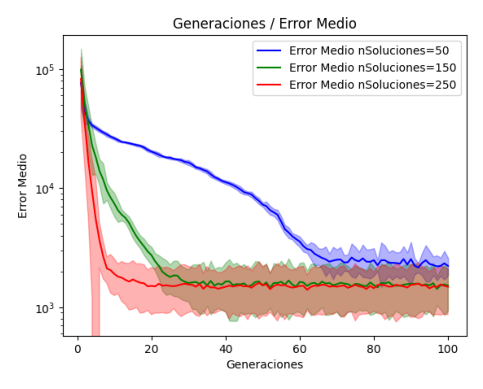

In [ ]:
v_variables,gens,errs_generales,errs_std_generales = ga_eval_per_gen(datos,100,100,5,70,20,-100,100,evaluarSolucion,c_punto_aleat,mut_gaussiana,10,v_variacion='k',lim_inf=5,lim_sup=95,incr=45,verbose=False)
plot_generacional(gens,v_variables,errs_generales,errs_std_generales,labelx='Generaciones',labely='Error Medio',var='k',log=True)

##Parámetro Probabilidad de Cruce (cProb)

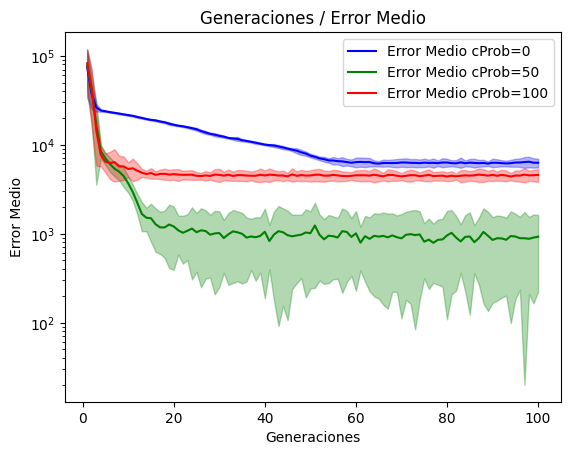

In [ ]:
v_variables,gens,errs_generales,errs_std_generales = ga_eval_per_gen(datos,100,100,5,70,20,-100,100,evaluarSolucion,c_punto_aleat,mut_gaussiana,10,v_variacion='cProb',lim_inf=0,lim_sup=100,incr=50,verbose=False)
plot_generacional(gens,v_variables,errs_generales,errs_std_generales,labelx='Generaciones',labely='Error Medio',var='cProb',log=True)

##Parámetro Probabilidad de Mutación (cMut)

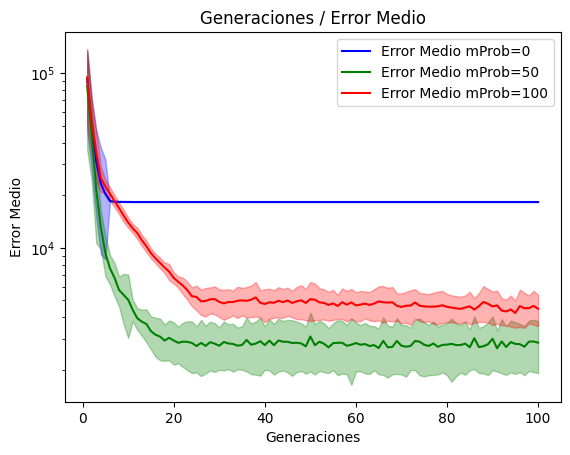

In [ ]:
v_variables,gens,errs_generales,errs_std_generales = ga_eval_per_gen(datos,100,100,5,70,20,-100,100,evaluarSolucion,c_punto_aleat,mut_gaussiana,10,v_variacion='mProb',lim_inf=0,lim_sup=100,incr=50,verbose=False)
plot_generacional(gens,v_variables,errs_generales,errs_std_generales,labelx='Generaciones',labely='Error Medio',var='mProb',log=True)

#Modifica el código para incorporar elitismo. La mejor solución se guarda en la élite y nunca se pierde hasta que venga una nueva mejor. Esta solución es la que se devuelve al final. ¿Has conseguido mejorar? ¿Por qué?


In [ ]:
eje_x = ['No Elitismo','Elitismo']

In [ ]:
err,err_std,err_el,err_std_el = ga_eval_experimento_elitismo(datos,100,100,5,70,50,-100,100,evaluarSolucion,c_aritmetico,mut_gaussiana,10,100)
errs= [err,err_el]
errs_std = [err_std,err_std_el]

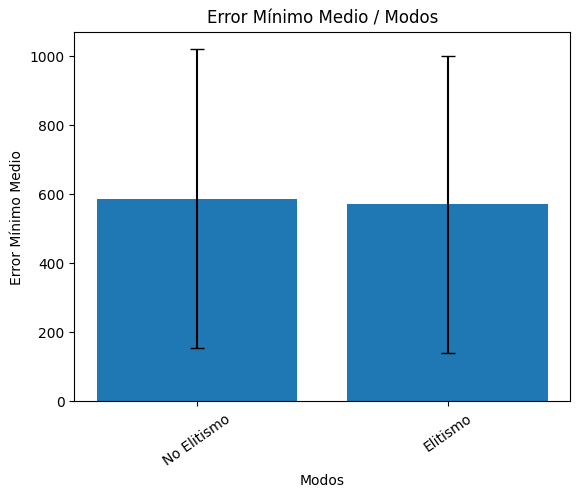

In [ ]:
plot_barras(eje_x, errs,errs_std, xlabel='Modos', ylabel='Error Mínimo Medio', title='Error Mínimo Medio / Modos')


In [ ]:
v_variables,err_med,tiem_med,err_std,tiem_std = ga_eval(datos,100,100,5,70,20,-100,100,evaluarSolucion,c_punto_aleat,mut_gaussiana,10,v_variacion='k',lim_inf=5,lim_sup=5,incr=10,tam_med=100,elitismo=True)
